In [39]:
# Importing the required packages

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [40]:
# Import the dataset
balance_data = pd.read_csv(r"C:\Users\naina\Downloads\balance+scale\balance-scale.data", sep=',', header=None)

# Displaying dataset information
print("Dataset Length: ", len(balance_data))
print("Dataset Shape: ", balance_data.shape)
print("Dataset: ", balance_data.head())

# Printing the dataset
print(balance_data)


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
     0  1  2  3  4
0    B  1  1  1  1
1    R  1  1  1  2
2    R  1  1  1  3
3    R  1  1  1  4
4    R  1  1  1  5
..  .. .. .. .. ..
620  L  5  5  5  1
621  L  5  5  5  2
622  L  5  5  5  3
623  L  5  5  5  4
624  B  5  5  5  5

[625 rows x 5 columns]


In [41]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [42]:
# to check the null values
balance_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

As we can see that there are no null values in the dataset

In [43]:
# to check summary of the numerical columns
balance_data.describe()

,1,2,3,4
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


#### Data Splitting

Data splitting means breaking a dataset into smaller parts, usually for training, validating, and testing machine learning models. This important step helps to ensure that the model works well on new, unseen data.

In [44]:
# Function to split the dataset into features and target variables

def splitdataset(balance_data):
    
    # Separating the target variable
    X=balance_data.values[:,1:5]
    Y=balance_data.values[:,0]
    
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    return X, Y, X_train, X_test, y_train, y_test

* def splitdataset(balance_data):This function defines the splitdataset() function, which is responsible for splitting the dataset into training and testing sets. 
* It separates the target variable (class labels) from the features and splits the data using the train_test_split() function from scikit-learn.
* It sets the test size to 30% and uses a random state of 100 for reproducibility.

#### Training with Gini Index:

In [58]:
def train_using_gini(X_train,X_test,y_train):
   
    # creating the classifier object
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    
    # Performing training
    clf_gini.fit(X_train,y_train)
    
    return clf_gini

* train_using_gini(X_train, X_test, y_train): This function defines the train_using_gini() function, which is responsible for training a decision tree classifier using the Gini index as the splitting criterion. 
* It creates a classifier object with the specified parameters (criterion, random state, max depth, min samples leaf) and trains it on the training data.

#### Training with Entropy:

In [59]:
def train_using_entropy(X_train,X_test,y_train):
    
    # Decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3, min_samples_leaf=5)
    
    # Performing training
    clf_entropy.fit(X_train,y_train)
    
    return clf_entropy 
        

* train_using_entropy(X_train, X_test, y_train): This function defines the train_using_entropy() function, which is responsible for training a decision tree classifier using entropy as the splitting criterion. 
* It creates a classifier object with the specified parameters (criterion, random state, max depth, min samples leaf) and trains it on the training data.

#### Prediction and Evaluation:

In [54]:
# Functions to make predictions
def prediction(X_test,clf_object):
    y_pred=clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test,y_pred):
    print("confusion Matrix: ",confusion_matrix(y_test,y_pred))
    print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
    print("Report: ",classification_report(y_test,y_pred))

1. 
    * prediction(X_test, clf_object): This function defines the prediction() function, which is responsible for making predictions on the test data using the trained classifier object.
    * It passes the test data to the classifier’s predict() method and prints the predicted class labels.
2.
    * cal_accuracy(y_test, y_pred): This function defines the cal_accuracy() function, which is responsible for calculating the accuracy of the predictions. 
    * It calculates and prints the confusion matrix, accuracy score, and classification report, providing detailed performance evaluation.



#### Plot the Decision Tree

In [55]:
from sklearn import tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

By using  plot_tree function from the sklearn.tree submodule to plot the decision tree. The function takes the following arguments:

* clf_object: The trained decision tree model object.
* filled=True: This argument fills the nodes of the tree with different colors based on the predicted class majority.
* feature_names: This argument provides the names of the features used in the decision tree.
* class_names: This argument provides the names of the different classes.
* rounded=True: This argument rounds the corners of the nodes for a more aesthetically pleasing appearance.

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


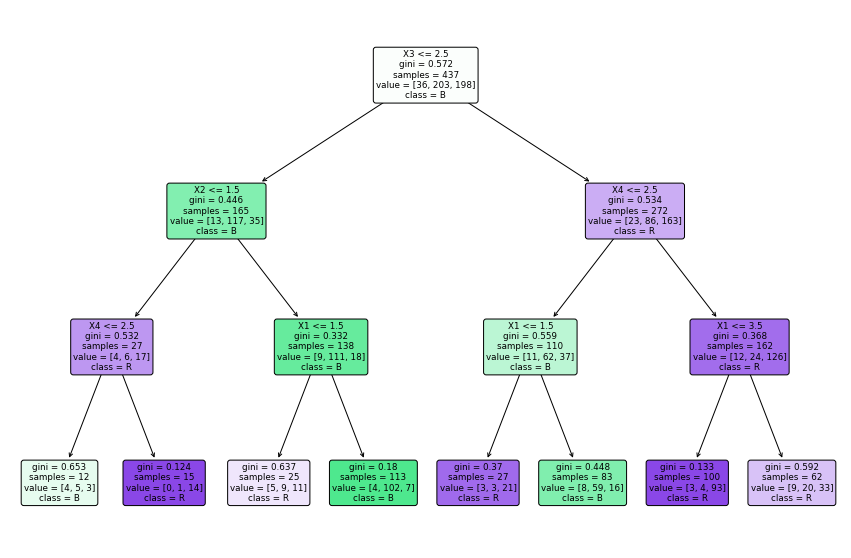

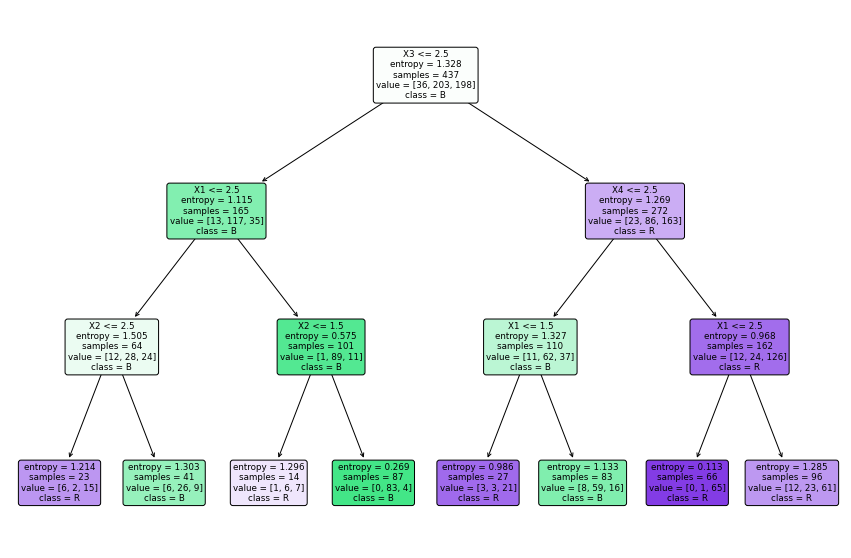

In [66]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    from sklearn.tree import plot_tree

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

This defines two decision tree classifiers, training and visualization of decision trees based on different splitting criteria, one using the **Gini Index** and the other using **Entropy**

#### Results using Gini Index

In [67]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy:  73.40425531914893
Report:                precision    recall  f1-score   support

           B       0.00      0.00      0.00

C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Results using Entropy

In [68]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy:  70.74468085106383
Report:                precision    recall  f1-score   support

           B       0.00      0.00      0.00   

C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\naina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
